<a href="https://colab.research.google.com/github/RK22000/AI-ML_tools_trial/blob/main/TorchTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt


In [146]:
# Say we have some data modeled by the function z = 29x + 14y + 5
A, B, C = 29.0, 14.0, 5.0
samples = torch.rand(1000, 2)*100
#torch.matmul(samples, torch.tensor([4, 5]))

z = []
for ip in samples:
  z.append(torch.matmul(ip, torch.tensor([A, B])) + C + torch.rand(1))
#z

In [147]:
w = torch.rand(2, requires_grad=True)
b = torch.rand(1, requires_grad=True)


In [148]:
lr = 5e-6
loss_fn = torch.nn.MSELoss()
_a, _b, _c = [w[0].item()], [w[1].item()], [b.item()]
_loss = []
for i, (x, target) in enumerate(zip(samples, z)):
  #print(x, y, target)
  #print(i)
  y = torch.matmul(x, w) + b
  #print(w.requires_grad)
  loss = loss_fn(target, y)
  loss.backward()
  if (i+1)%10 == 0:
    w_step = w.grad*lr
    b_step = b.grad*lr
    with torch.no_grad():
      w -= w_step
      b -= b_step
    w.grad.zero_()
    b.grad.zero_()
    _loss.append(loss)
    _a.append(w[0].item())
    _b.append(w[1].item())
    _c.append(b.item())

#_a, _b, _c, _loss

Text(0.5, 1.0, 'C = 5.0')

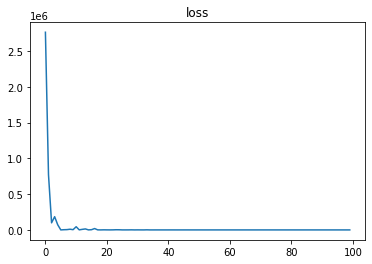

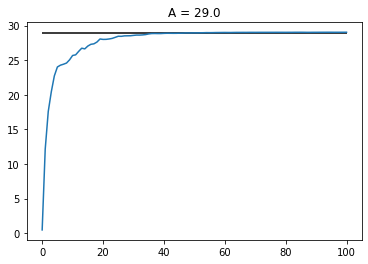

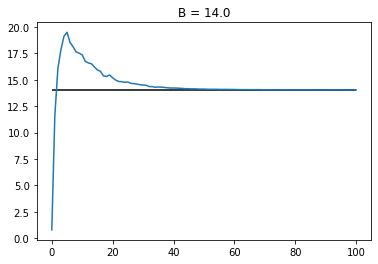

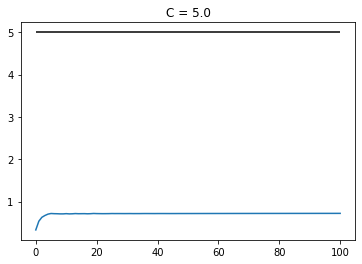

In [150]:
xmin, xmax = 0, 100
plt.plot([i.item() for i in _loss])
plt.title("loss")
plt.figure()
plt.plot([i for i in _a])
plt.hlines(A, xmin, xmax)
plt.title(f"A = {A}")
plt.figure()
plt.plot([i for i in _b])
plt.hlines(B, xmin, xmax)
plt.title(f"B = {B}")
plt.figure()
plt.plot([i for i in _c])
plt.hlines(C, xmin, xmax)
plt.title(f"C = {C}")